In [1]:
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
print(__doc__)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
import cPickle as pkl
from NeuroTools import analysis
import statsmodels.api as sm

/home/chenani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Automatically created module for IPython interactive environment


In [4]:
sns.set_style('white')
sns.set_context("poster",font_scale=1.7)
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
seabC = sns.xkcd_palette(colors)

In [5]:
anID = '405'
dataFolder = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat405Lesion/dataFiles/sleepDB/'
rippDB = pd.read_pickle(dataFolder+'Rat'+anID+'-RipplesTimeDB-SKLRN.pd')
fgRipp_percentiles = pd.read_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')

In [6]:
rippDB = rippDB.replace('01-sleep01','PRE')
rippDB = rippDB.replace('03-sleep02','POST')
print set(rippDB.session)
#rippDB = rippDB.replace('day4','day3')
#rippDB.to_pickle(dataFolder+'Rat'+anID+'-RipplesTimeDB-SKLRN.pd')
#fgRipp_percentiles[fgRipp_percentiles.animal=='Rat616Control'][['date','FG_prcnt','SWR_prcnt']]
rippDB

set(['PRE', 'POST'])


,t_i,t_f,peak_value,t_peak,epoch,date,session,animal,PC1,PC2,PC3,PC4,PC5,wPC1,wPC2,wPC3,wPC4,wPC5,wc
0,2.052427e+07,2.052436e+07,247334.017514,2.052428e+07,NA,day1,PRE,Rat405Lesion,-10.739515,2.225830,2.436271,0.194459,-0.188042,6.766562,1.171601,-3.129656,-0.985343,0.477417,100.0
1,2.052510e+07,2.052525e+07,316466.994067,2.052521e+07,NA,day1,PRE,Rat405Lesion,-2.333854,3.708079,-1.300241,-1.844773,1.094878,5.728052,3.104309,-0.326507,1.420580,-0.044818,100.0
2,2.053482e+07,2.053493e+07,410950.452760,2.053486e+07,NA,day1,PRE,Rat405Lesion,-1.772276,-2.726829,-0.235145,1.398501,0.784232,-0.208735,-3.433755,0.492279,-0.223446,-2.320917,300.0
3,2.059316e+07,2.059322e+07,210511.039665,2.059320e+07,rem,day1,PRE,Rat405Lesion,-2.117119,0.350258,-0.411229,-3.917347,-2.094571,2.946280,0.993515,2.409891,0.483686,3.881651,100.0
4,2.060629e+07,2.060664e+07,365955.659851,2.060634e+07,rem,day1,PRE,Rat405Lesion,1.277329,-0.988374,-0.307173,-1.720120,-1.204901,-4.015256,-0.966514,-0.611068,-1.040397,1.709874,300.0
5,2.062159e+07,2.062165e+07,227951.770572,2.062163e+07,rem,day1,PRE,Rat405Lesion,-2.450895,1.933771,-0.448284,-1.292667,0.642757,4.754040,-0.163014,-0.707847,1.407355,2.047691,100.0
6,2.064184e+07,2.064191e+07,251423.576999,2.064188e+07,rem,day1,PRE,Rat405Lesion,-1.448872,2.186371,-0.487894,-3.715032,-2.010866,3.838671,3.228372,1.710653,-0.009581,4.144512,100.0
7,2.064225e+07,2.064233e+07,262688.932219,2.064229e+07,rem,day1,PRE,Rat405Lesion,3.471458,2.299761,-2.819765,-0.022651,0.636539,-2.388435,2.889071,-1.023720,3.286412,-0.826744,300.0
8,2.064240e+07,2.064251e+07,325646.360475,2.064244e+07,rem,day1,PRE,Rat405Lesion,-1.607015,1.979828,-1.340460,-0.458404,-1.331586,2.443609,0.658529,-2.620562,2.111787,1.384047,100.0
9,2.064253e+07,2.064263e+07,384913.367755,2.064257e+07,rem,day1,PRE,Rat405Lesion,-2.983145,-1.310877,-0.004044,4.040301,-1.498425,0.629773,-3.798008,-3.702053,-1.190314,-2.762279,300.0


(55,) (470,)
90.9090909091 --- 100.0 --- 89.1304347826


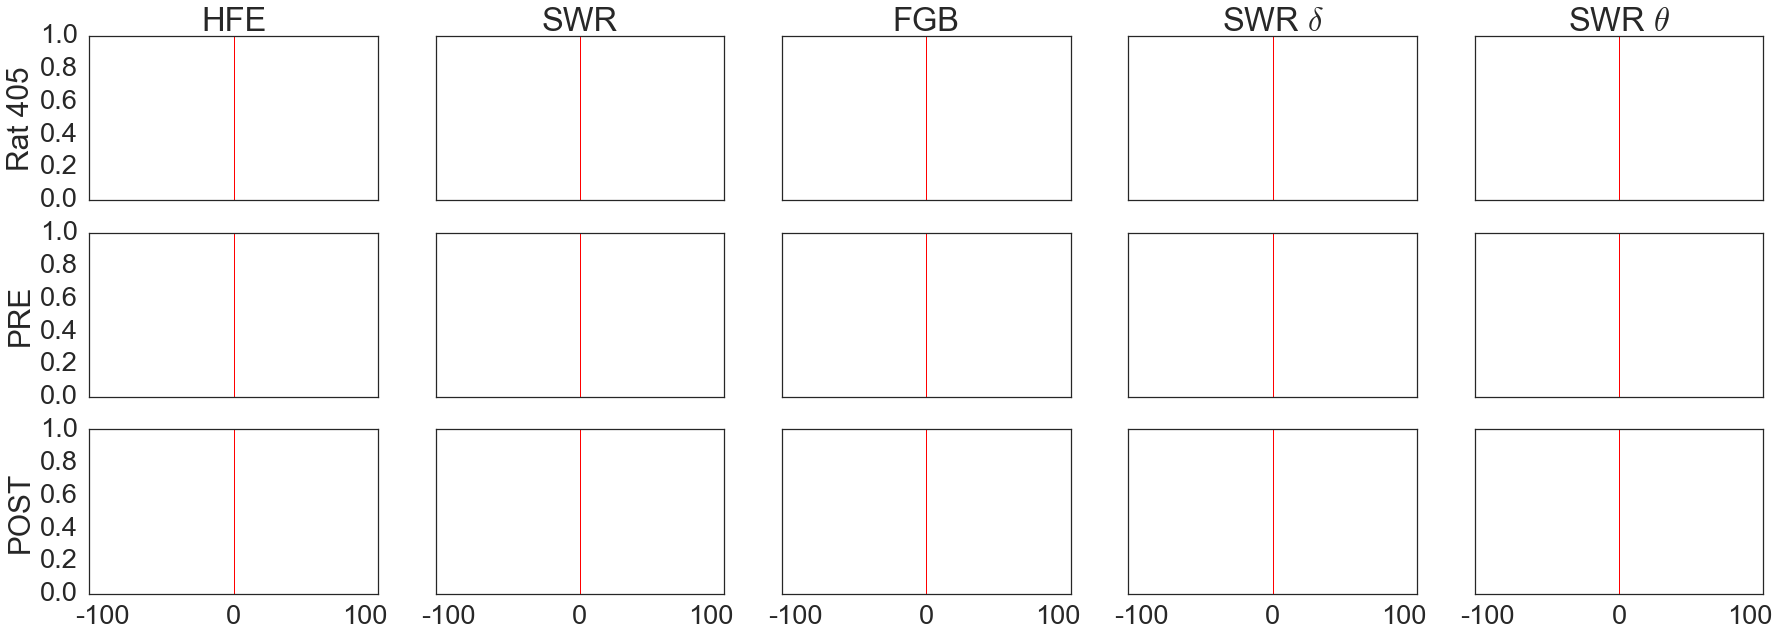

In [75]:
diffList = []
diffList_PRE = []
diffList_POST = []
f,([[ax,bx,cx,dx,ex],
    [fx,gx,hx,ix,jx],
    [kx,lx,mx,nx,ox]]) = pl.subplots(3,5,figsize=[30,10],sharex=True,sharey=True)
for idd,dday in enumerate([1]):
    rDF = rippDB[rippDB.date=='day'+str(dday)]
    rDF_PRE  = rDF[rDF.session=='PRE']
    rDF_POST = rDF[rDF.session=='POST']
    ###
    swrDF = rDF[rDF.wc==300]
    swrDF_PRE  = swrDF[swrDF.session=='PRE']
    swrDF_POST = swrDF[swrDF.session=='POST']
    ###
    swrDFT = rDF[(rDF.wc==300)&(rDF.epoch=='rem')]
    swrDFT_PRE  = swrDFT[swrDFT.session=='PRE']
    swrDFT_POST = swrDFT[swrDFT.session=='POST']
    ###
    swrDFD = rDF[(rDF.wc==300)&(rDF.epoch=='sws')]
    swrDFD_PRE  = swrDFD[swrDFD.session=='PRE']
    swrDFD_POST = swrDFD[swrDFD.session=='POST']
    ###
    fgbDF = rDF[rDF.wc==100]
    fgbDF_PRE  = fgbDF[fgbDF.session=='PRE']
    fgbDF_POST = fgbDF[fgbDF.session=='POST']
    ###
    fgbDFT = rDF[(rDF.wc==100)&(rDF.epoch=='rem')]
    fgbDFT_PRE  = fgbDFT[fgbDFT.session=='PRE']
    fgbDFT_POST = fgbDFT[fgbDFT.session=='POST']
    ###
    fgbDFD = rDF[(rDF.wc==100)&(rDF.epoch=='sws')]
    fgbDFD_PRE  = fgbDFD[fgbDFD.session=='PRE']
    fgbDFD_POST = fgbDFD[fgbDFD.session=='POST']
    #---------------------------------------------------------
    rTS = rDF.t_peak.as_matrix()/1e3
    rTS_PRE  = rDF_PRE.t_peak.as_matrix()/1e3
    rTS_POST = rDF_POST.t_peak.as_matrix()/1e3
    ###########
    swrTS = swrDF.t_peak.as_matrix()/1e3
    swrTS_PRE  = swrDF_PRE.t_peak.as_matrix()/1e3
    swrTS_POST = swrDF_POST.t_peak.as_matrix()/1e3
    ###
    swrTST = swrDFT.t_peak.as_matrix()/1e3
    swrTST_PRE = swrDFT_PRE.t_peak.as_matrix()/1e3
    swrTST_POST = swrDFT_POST.t_peak.as_matrix()/1e3
    ###
    swrTSD = swrDFD.t_peak.as_matrix()/1e3
    swrTSD_PRE  = swrDFD_PRE.t_peak.as_matrix()/1e3
    swrTSD_POST = swrDFD_POST.t_peak.as_matrix()/1e3
    ###########
    fgbTS = fgbDF.t_peak.as_matrix()/1e3
    fgbTS_PRE  = fgbDF_PRE.t_peak.as_matrix()/1e3
    fgbTS_POST = fgbDF_POST.t_peak.as_matrix()/1e3
    ###
    fgbTST = fgbDFT.t_peak.as_matrix()/1e3
    fgbTST_PRE  = fgbDFT_PRE.t_peak.as_matrix()/1e3
    fgbTST_POST = fgbDFT_POST.t_peak.as_matrix()/1e3
    ###
    fgbTSD = fgbDFD.t_peak.as_matrix()/1e3
    fgbTSD_PRE  = fgbDFD_PRE.t_peak.as_matrix()/1e3
    fgbTSD_POST = fgbDFD_POST.t_peak.as_matrix()/1e3
    #---------------------------------------------------------
    ###########
    pDF = pd.read_pickle(dataFolder+anID+'-roDB-D'+str(dday)+'.db')
    pDF = pDF[pDF.tSub>4]
    pDF = pDF.replace('sleep01','PRE')
    pDF = pDF.replace('sleep02','POST')
    pTS = pDF.t_peak.as_matrix()-0.02
    pTS_PRE = pDF[pDF.session=='PRE'].t_peak.as_matrix()-0.02
    pTS_POST = pDF[pDF.session=='POST'].t_peak.as_matrix()-0.02
    print pTS.shape,rTS.shape#,set(pDF.session)
    lag=0.15
    bin_edges = np.arange(-1.0*lag,lag,0.01)
    ######################################
    rDiff, pred, rN = analysis.crosscorrelate(rTS,pTS,lag=lag)
    rDiff_PRE , pred, rN_PRE  = analysis.crosscorrelate(rTS_PRE,pTS_PRE,lag=lag)
    rDiff_POST, pred, rN_POST = analysis.crosscorrelate(rTS_POST,pTS_POST,lag=lag)
    print 1e2*rDiff.size/pTS.size,'---',1e2*rDiff_PRE.size/ pTS_PRE.size,'---',1e2*rDiff_POST.size/pTS_POST.size

    ######################################
    swrDiff, pred, swrN = analysis.crosscorrelate(swrTS,pTS,lag=lag)
    swrDiff_PRE, pred, swrN_PRE = analysis.crosscorrelate(swrTS_PRE,pTS,lag=lag)
    swrDiff_POST, pred, swrN_POST = analysis.crosscorrelate(swrTS_POST,pTS,lag=lag)
    ###
    swrDiffT, pred, swrNT = analysis.crosscorrelate(swrTST,pTS,lag=lag)
    swrDiffT_PRE,  pred, swrNT_PRE = analysis.crosscorrelate(swrTST_PRE,pTS,lag=lag)
    swrDiffT_POST, pred, swrNT_POST = analysis.crosscorrelate(swrTST_POST,pTS,lag=lag)
    ###
    swrDiffD, pred, swrND = analysis.crosscorrelate(swrTSD,pTS,lag=lag)
    swrDiffD_PRE, pred, swrND_PRE = analysis.crosscorrelate(swrTSD_PRE,pTS,lag=lag)
    swrDiffD_POST, pred, swrND_POST = analysis.crosscorrelate(swrTSD_POST,pTS,lag=lag)
    #######################################
    fgbDiff, pred, fgbN = analysis.crosscorrelate(fgbTS,pTS,lag=lag)
    fgbDiff_PRE, pred, fgbN_PRE = analysis.crosscorrelate(fgbTS_PRE,pTS,lag=lag)
    fgbDiff_POST, pred, fgbN_POST = analysis.crosscorrelate(fgbTS_POST,pTS,lag=lag)
    ###
    fgbDiffT, pred, fgbNT = analysis.crosscorrelate(fgbTST,pTS,lag=lag)
    fgbDiffT_PRE, pred, fgbNT_PRE = analysis.crosscorrelate(fgbTST_PRE,pTS,lag=lag)
    fgbDiffT_POST, pred, fgbNT_POST = analysis.crosscorrelate(fgbTST_POST,pTS,lag=lag)
    ###
    fgbDiffD, pred, fgbND = analysis.crosscorrelate(fgbTSD,pTS,lag=lag)
    fgbDiffD_PRE, pred, fgbND_PRE = analysis.crosscorrelate(fgbTSD_PRE,pTS,lag=lag)
    fgbDiffD_POST, pred, fgbND_POST = analysis.crosscorrelate(fgbTSD_POST,pTS,lag=lag)
    ########################################
    data = {'hfe': rDiff,'swr':swrDiff,'swrDelta':swrDiffD,'swrTheta':swrDiffT
                        ,'fgb':fgbDiff,'fgbDelta':fgbDiffD,'fgbTheta':fgbDiffT
                        ,'Nhfe': rN,'Nswr':swrN,'NswrD':swrND,'NswrT':swrNT
                                   ,'Nfgb':fgbN,'NfgbD':fgbND,'NfgbT':fgbNT}
    data_PRE  = {'hfe': rDiff_PRE,'swr':swrDiff_PRE,'swrDelta':swrDiffD_PRE,'swrTheta':swrDiffT_PRE
                        ,'fgb':fgbDiff_PRE,'fgbDelta':fgbDiffD_PRE,'fgbTheta':fgbDiffT_PRE
                        ,'Nhfe': rN_PRE,'Nswr':swrN_PRE,'NswrD':swrND_PRE,'NswrT':swrNT_PRE
                        ,'Nfgb':fgbN_PRE,'NfgbD':fgbND_PRE,'NfgbT':fgbNT_PRE}
    data_POST = {'hfe': rDiff_POST,'swr':swrDiff_POST,'swrDelta':swrDiffD_POST,'swrTheta':swrDiffT_POST
                        ,'fgb':fgbDiff_POST,'fgbDelta':fgbDiffD_POST,'fgbTheta':fgbDiffT_POST
                        ,'Nhfe': rN_POST,'Nswr':swrN_POST,'NswrD':swrND_POST,'NswrT':swrNT_POST
                        ,'Nfgb':fgbN_POST,'NfgbD':fgbND_POST,'NfgbT':fgbNT_POST}
    diffList.append(data)
    diffList_PRE.append(data_PRE)
    diffList_POST.append(data_POST)
    ###################PLOTS################
    bw = sm.nonparametric.bandwidths.bw_silverman(rDiff)/2
    #bw = 0.01#'silverman'
    rCounts, bin_ = np.histogram(rDiff,bins=bin_edges)/rN
    swrCounts, bin_ = np.histogram(swrDiff,bins=bin_edges)/swrN
    swrCountsT, bin_ = np.histogram(swrDiffT,bins=bin_edges)/swrNT
    swrCountsD, bin_ = np.histogram(swrDiffD,bins=bin_edges)/swrND
    fgbCounts, bin_ = np.histogram(fgbDiff,bins=bin_edges)/fgbN
    edge_distances = np.diff(bin_edges)
    bin_centers = bin_edges[1:] - edge_distances/2
    #ax.plot(bin_centers, idd/1e10+rCounts, lw=3,alpha=0.85,c=seabC[idd])
    '''sns.distplot(rDiff,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=ax)
    sns.distplot(rDiff_PRE,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=fx)
    if rDiff_POST.size:
        sns.distplot(rDiff_POST,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=kx)
    #bx.plot(bin_centers, idd/1e10+swrCounts, lw=3,alpha=0.85,c=seabC[idd])
    sns.distplot(swrDiff,hist=False,rug=True,kde_kws={'bw':bw},color=seabC[idd],ax=bx)
    sns.distplot(swrDiff_PRE,hist=False,rug=True,kde_kws={'bw':bw},color=seabC[idd],ax=gx)
    if swrDiff_POST.size:
        sns.distplot(swrDiff_POST,hist=False,rug=True,kde_kws={'bw':bw},color=seabC[idd],ax=lx)
    cx.plot(bin_centers, idd/1e10+fgbCounts, lw=3,alpha=0.85,c=seabC[idd],label='day'+str(dday))
    sns.distplot(fgbDiff,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=cx)
    sns.distplot(fgbDiff_PRE,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=hx)
    if fgbDiff_POST.size:
        sns.distplot(fgbDiff_POST,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=mx)
    #dx.plot(bin_centers, idd/1e10+swrCountsD, lw=3,alpha=0.95,c=seabC[idd])
    sns.distplot(swrDiffD,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=dx)
    sns.distplot(swrDiffD_PRE,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=ix)
    if swrDiffD_POST.size:
        sns.distplot(swrDiffD_POST,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=nx)
    #ex.plot(bin_centers, idd/1e10+swrCountsT, lw=3,alpha=0.95,c=seabC[idd])
    sns.distplot(swrDiffT,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=ex)
    sns.distplot(swrDiffT_PRE,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=jx)
    if swrDiffT_POST.size:
        sns.distplot(swrDiffT_POST,hist=False,rug=False,kde_kws={'bw':bw},color=seabC[idd],ax=ox)'''
    #cx.plot(bin_centers, idd/1e10+fgbCounts, lw=3,alpha=0.85,c=seabC[idd],label='day'+str(dday))
    for item in zip([rDiff,swrDiff,fgbDiff,swrDiffD,swrDiffT,
                     rDiff_PRE,swrDiff_PRE,fgbDiff_PRE,swrDiffD_PRE,swrDiffT_PRE,
                     rDiff_POST,swrDiff_POST,fgbDiff_POST,swrDiffD_POST,swrDiffT_POST],
                    [ax,bx,cx,dx,ex,fx,gx,hx,ix,jx,kx,lx,mx,nx,ox]):
        if item[0].size>1:
            a=1
            #sns.distplot(item[0],hist=False,rug=True,kde_kws={'bw':bw},color=seabC[idd],ax=item[1])
for axx in[ax,bx,cx,dx,ex,fx,gx,hx,ix,jx,kx,lx,mx,nx,ox]:
    axx.axvline(0,color='r',linewidth=1)
#bx.axvline(0,color='r',linewidth=1)
#cx.axvline(0,color='r',linewidth=1)
#dx.axvline(0,color='r',linewidth=1)
#ex.axvline(0,color='r',linewidth=1)
ax.set_title('HFE')
ax.set_ylabel('Rat '+ anID)
fx.set_ylabel('PRE')
kx.set_ylabel('POST')
bx.set_title('SWR')
cx.set_title('FGB')
dx.set_title(r'SWR $\delta$')
ex.set_title(r'SWR $\theta$')
ax.set_xlim([-0.11,0.11])
ax.set_xticks([-0.1,0,0.1])
ax.set_xticklabels([-100,0,100])
#bx.set_yticks([])
#bx.set_xticks([])
#cx.set_yticks([])
cx.legend()
#f.savefig(dataFolder+anID+'-CrossCorrelations-4minus.pdf')

In [144]:
pkl.dump(diffList,open(dataFolder+anID+'-diffList-4plus.npArr','wb'),pkl.HIGHEST_PROTOCOL)
pkl.dump(diffList_PRE,open(dataFolder+anID+'-diffList-4plus-PRE.npArr','wb'),pkl.HIGHEST_PROTOCOL)
pkl.dump(diffList_POST,open(dataFolder+anID+'-diffList-4plus-POST.npArr','wb'),pkl.HIGHEST_PROTOCOL)

In [157]:
pkl.dump(diffList,open(dataFolder+anID+'-diffList-4minus.npArr','wb'),pkl.HIGHEST_PROTOCOL)
pkl.dump(diffList_PRE,open(dataFolder+anID+'-diffList-4minus-PRE.npArr','wb'),pkl.HIGHEST_PROTOCOL)
pkl.dump(diffList_POST,open(dataFolder+anID+'-diffList-4minus-POST.npArr','wb'),pkl.HIGHEST_PROTOCOL)

/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:117: RuntimeWarning: invalid value encountered in divide
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:117: RuntimeWarning: divide by zero encountered in divide
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:118: RuntimeWarning: invalid value encountered in divide
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:118: RuntimeWarning: divide by zero encountered in divide
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:119: RuntimeWarning: invalid value encountered in divide
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:119: RuntimeWarning: divide by zero encountered in divide
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:120: RuntimeWarning: invalid value encountered in divide
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:120: RuntimeWa

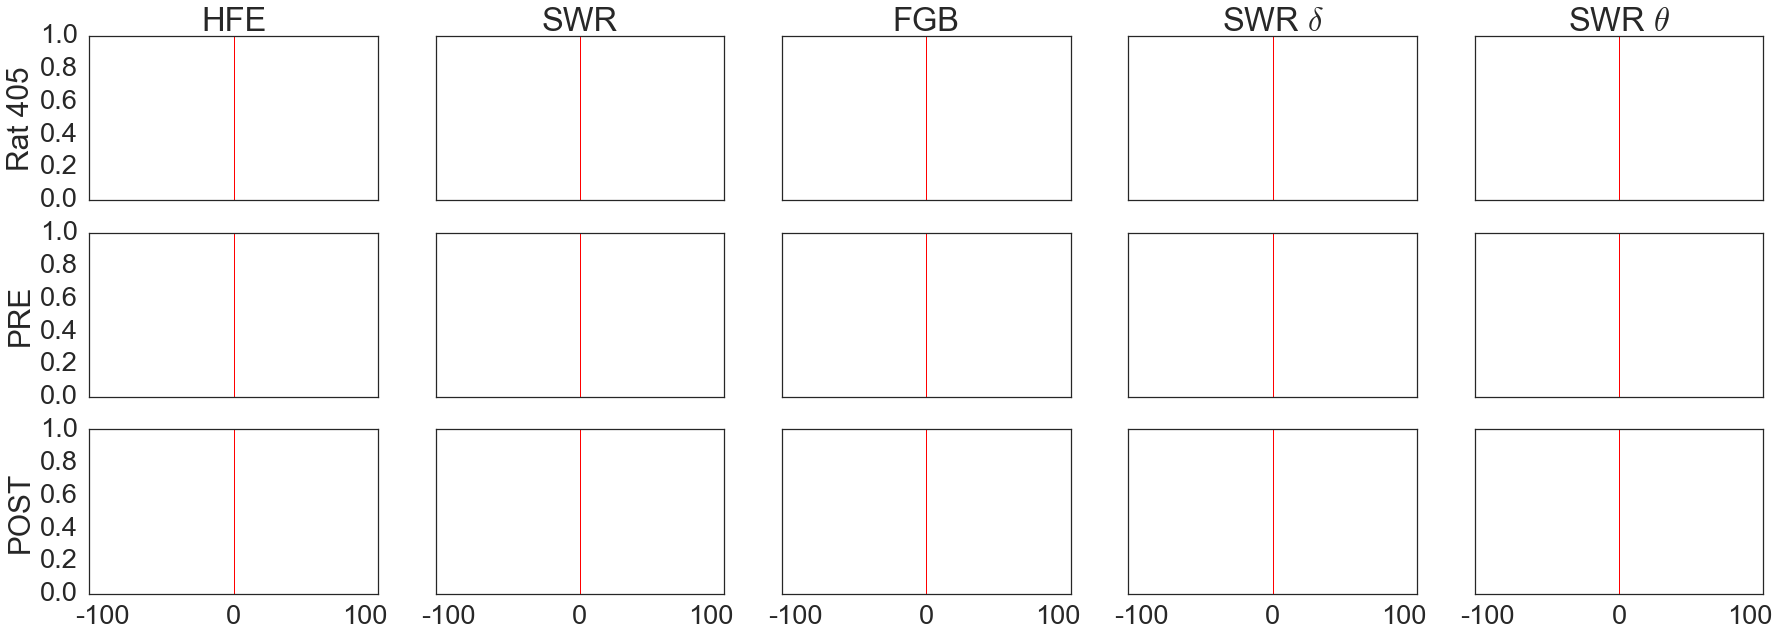

In [76]:
diffList = []
diffList_PRE = []
diffList_POST = []
f,([[ax,bx,cx,dx,ex],
    [fx,gx,hx,ix,jx],
    [kx,lx,mx,nx,ox]]) = pl.subplots(3,5,figsize=[30,10],sharex=True,sharey=True)
for idd,dday in enumerate([1]):
    rDF = rippDB[rippDB.date=='day'+str(dday)]
    rDF_PRE  = rDF[rDF.session=='PRE']
    rDF_POST = rDF[rDF.session=='POST']
    ###
    swrDF = rDF[rDF.wc==300]
    swrDF_PRE  = swrDF[swrDF.session=='PRE']
    swrDF_POST = swrDF[swrDF.session=='POST']
    ###
    swrDFT = rDF[(rDF.wc==300)&(rDF.epoch=='rem')]
    swrDFT_PRE  = swrDFT[swrDFT.session=='PRE']
    swrDFT_POST = swrDFT[swrDFT.session=='POST']
    ###
    swrDFD = rDF[(rDF.wc==300)&(rDF.epoch=='sws')]
    swrDFD_PRE  = swrDFD[swrDFD.session=='PRE']
    swrDFD_POST = swrDFD[swrDFD.session=='POST']
    ###
    fgbDF = rDF[rDF.wc==100]
    fgbDF_PRE  = fgbDF[fgbDF.session=='PRE']
    fgbDF_POST = fgbDF[fgbDF.session=='POST']
    ###
    fgbDFT = rDF[(rDF.wc==100)&(rDF.epoch=='rem')]
    fgbDFT_PRE  = fgbDFT[fgbDFT.session=='PRE']
    fgbDFT_POST = fgbDFT[fgbDFT.session=='POST']
    ###
    fgbDFD = rDF[(rDF.wc==100)&(rDF.epoch=='sws')]
    fgbDFD_PRE  = fgbDFD[fgbDFD.session=='PRE']
    fgbDFD_POST = fgbDFD[fgbDFD.session=='POST']
    #---------------------------------------------------------
    rTS = rDF.t_peak.as_matrix()/1e3
    rTS_PRE  = rDF_PRE.t_peak.as_matrix()/1e3
    rTS_POST = rDF_POST.t_peak.as_matrix()/1e3
    ###########
    swrTS = swrDF.t_peak.as_matrix()/1e3
    swrTS_PRE  = swrDF_PRE.t_peak.as_matrix()/1e3
    swrTS_POST = swrDF_POST.t_peak.as_matrix()/1e3
    ###
    swrTST = swrDFT.t_peak.as_matrix()/1e3
    swrTST_PRE = swrDFT_PRE.t_peak.as_matrix()/1e3
    swrTST_POST = swrDFT_POST.t_peak.as_matrix()/1e3
    ###
    swrTSD = swrDFD.t_peak.as_matrix()/1e3
    swrTSD_PRE  = swrDFD_PRE.t_peak.as_matrix()/1e3
    swrTSD_POST = swrDFD_POST.t_peak.as_matrix()/1e3
    ###########
    fgbTS = fgbDF.t_peak.as_matrix()/1e3
    fgbTS_PRE  = fgbDF_PRE.t_peak.as_matrix()/1e3
    fgbTS_POST = fgbDF_POST.t_peak.as_matrix()/1e3
    ###
    fgbTST = fgbDFT.t_peak.as_matrix()/1e3
    fgbTST_PRE  = fgbDFT_PRE.t_peak.as_matrix()/1e3
    fgbTST_POST = fgbDFT_POST.t_peak.as_matrix()/1e3
    ###
    fgbTSD = fgbDFD.t_peak.as_matrix()/1e3
    fgbTSD_PRE  = fgbDFD_PRE.t_peak.as_matrix()/1e3
    fgbTSD_POST = fgbDFD_POST.t_peak.as_matrix()/1e3
    #---------------------------------------------------------
    ###########
    pDF = pd.read_pickle(dataFolder+anID+'-roDB-D'+str(dday)+'-Chsig.db')
    pTS = pDF[pDF.Rpv==1].t_peak.as_matrix()-0.02
    #print pTS.shape
    lag=0.15
    bin_edges = np.arange(-1.0*lag,lag,0.01)
    ######################################
    rDiff, pred, rN = analysis.crosscorrelate(rTS,pTS,lag=lag)
    rDiff_PRE , pred, rN_PRE  = analysis.crosscorrelate(rTS_PRE,pTS,lag=lag)
    rDiff_POST, pred, rN_POST = analysis.crosscorrelate(rTS_POST,pTS,lag=lag)
    ######################################
    swrDiff, pred, swrN = analysis.crosscorrelate(swrTS,pTS,lag=lag)
    swrDiff_PRE, pred, swrN_PRE = analysis.crosscorrelate(swrTS_PRE,pTS,lag=lag)
    swrDiff_POST, pred, swrN_POST = analysis.crosscorrelate(swrTS_POST,pTS,lag=lag)
    ###
    swrDiffT, pred, swrNT = analysis.crosscorrelate(swrTST,pTS,lag=lag)
    swrDiffT_PRE,  pred, swrNT_PRE = analysis.crosscorrelate(swrTST_PRE,pTS,lag=lag)
    swrDiffT_POST, pred, swrNT_POST = analysis.crosscorrelate(swrTST_POST,pTS,lag=lag)
    ###
    swrDiffD, pred, swrND = analysis.crosscorrelate(swrTSD,pTS,lag=lag)
    swrDiffD_PRE, pred, swrND_PRE = analysis.crosscorrelate(swrTSD_PRE,pTS,lag=lag)
    swrDiffD_POST, pred, swrND_POST = analysis.crosscorrelate(swrTSD_POST,pTS,lag=lag)
    #######################################
    fgbDiff, pred, fgbN = analysis.crosscorrelate(fgbTS,pTS,lag=lag)
    fgbDiff_PRE, pred, fgbN_PRE = analysis.crosscorrelate(fgbTS_PRE,pTS,lag=lag)
    fgbDiff_POST, pred, fgbN_POST = analysis.crosscorrelate(fgbTS_POST,pTS,lag=lag)
    ###
    fgbDiffT, pred, fgbNT = analysis.crosscorrelate(fgbTST,pTS,lag=lag)
    fgbDiffT_PRE, pred, fgbNT_PRE = analysis.crosscorrelate(fgbTST_PRE,pTS,lag=lag)
    fgbDiffT_POST, pred, fgbNT_POST = analysis.crosscorrelate(fgbTST_POST,pTS,lag=lag)
    ###
    fgbDiffD, pred, fgbND = analysis.crosscorrelate(fgbTSD,pTS,lag=lag)
    fgbDiffD_PRE, pred, fgbND_PRE = analysis.crosscorrelate(fgbTSD_PRE,pTS,lag=lag)
    fgbDiffD_POST, pred, fgbND_POST = analysis.crosscorrelate(fgbTSD_POST,pTS,lag=lag)
    ########################################
    data = {'hfe': rDiff,'swr':swrDiff,'swrDelta':swrDiffD,'swrTheta':swrDiffT
                        ,'fgb':fgbDiff,'fgbDelta':fgbDiffD,'fgbTheta':fgbDiffT
                        ,'Nhfe': rN,'Nswr':swrN,'NswrD':swrND,'NswrT':swrNT
                                   ,'Nfgb':fgbN,'NfgbD':fgbND,'NfgbT':fgbNT}
    data_PRE  = {'hfe': rDiff_PRE,'swr':swrDiff_PRE,'swrDelta':swrDiffD_PRE,'swrTheta':swrDiffT_PRE
                        ,'fgb':fgbDiff_PRE,'fgbDelta':fgbDiffD_PRE,'fgbTheta':fgbDiffT_PRE
                        ,'Nhfe': rN_PRE,'Nswr':swrN_PRE,'NswrD':swrND_PRE,'NswrT':swrNT_PRE
                        ,'Nfgb':fgbN_PRE,'NfgbD':fgbND_PRE,'NfgbT':fgbNT_PRE}
    data_POST = {'hfe': rDiff_POST,'swr':swrDiff_POST,'swrDelta':swrDiffD_POST,'swrTheta':swrDiffT_POST
                        ,'fgb':fgbDiff_POST,'fgbDelta':fgbDiffD_POST,'fgbTheta':fgbDiffT_POST
                        ,'Nhfe': rN_POST,'Nswr':swrN_POST,'NswrD':swrND_POST,'NswrT':swrNT_POST
                        ,'Nfgb':fgbN_POST,'NfgbD':fgbND_POST,'NfgbT':fgbNT_POST}
    diffList.append(data)
    diffList_PRE.append(data_PRE)
    diffList_POST.append(data_POST)
    ###################PLOTS################
    #bw = sm.nonparametric.bandwidths.bw_silverman(rDiff)
    bw = 0.015
    rCounts, bin_ = np.histogram(rDiff,bins=bin_edges)/rN
    swrCounts, bin_ = np.histogram(swrDiff,bins=bin_edges)/swrN
    swrCountsT, bin_ = np.histogram(swrDiffT,bins=bin_edges)/swrNT
    swrCountsD, bin_ = np.histogram(swrDiffD,bins=bin_edges)/swrND
    fgbCounts, bin_ = np.histogram(fgbDiff,bins=bin_edges)/fgbN
    edge_distances = np.diff(bin_edges)
    bin_centers = bin_edges[1:] - edge_distances/2
    #ax.plot(bin_centers, idd/1e10+rCounts, lw=3,alpha=0.85,c=seabC[idd])
    for item in zip([rDiff,swrDiff,fgbDiff,swrDiffD,swrDiffT,
                     rDiff_PRE,swrDiff_PRE,fgbDiff_PRE,swrDiffD_PRE,swrDiffT_PRE,
                     rDiff_POST,swrDiff_POST,fgbDiff_POST,swrDiffD_POST,swrDiffT_POST],
                    [ax,bx,cx,dx,ex,fx,gx,hx,ix,jx,kx,lx,mx,nx,ox]):
        if item[0].size>1:
            sns.distplot(item[0],hist=False,rug=True,kde_kws={'bw':bw},color=seabC[idd],ax=item[1])
for axx in[ax,bx,cx,dx,ex,fx,gx,hx,ix,jx,kx,lx,mx,nx,ox]:
    axx.axvline(0,color='r',linewidth=1)
ax.set_title('HFE')
ax.set_ylabel('Rat '+ anID)
fx.set_ylabel('PRE')
kx.set_ylabel('POST')
bx.set_title('SWR')
cx.set_title('FGB')
dx.set_title(r'SWR $\delta$')
ex.set_title(r'SWR $\theta$')
ax.set_xlim([-0.11,0.11])
ax.set_xticks([-0.1,0,0.1])
ax.set_xticklabels([-100,0,100])
#bx.set_yticks([])
#bx.set_xticks([])
#cx.set_yticks([])
cx.legend()
f.savefig(dataFolder+anID+'-CrossCorrelations-sig.pdf')

In [77]:
pkl.dump(diffList,open(dataFolder+anID+'-diffList-Csig.npArr','wb'),pkl.HIGHEST_PROTOCOL)
pkl.dump(diffList_PRE,open(dataFolder+anID+'-diffList-PRE-Csig.npArr','wb'),pkl.HIGHEST_PROTOCOL)
pkl.dump(diffList_POST,open(dataFolder+anID+'-diffList-POST-Csig.npArr','wb'),pkl.HIGHEST_PROTOCOL)

818.691639141
766.151421065


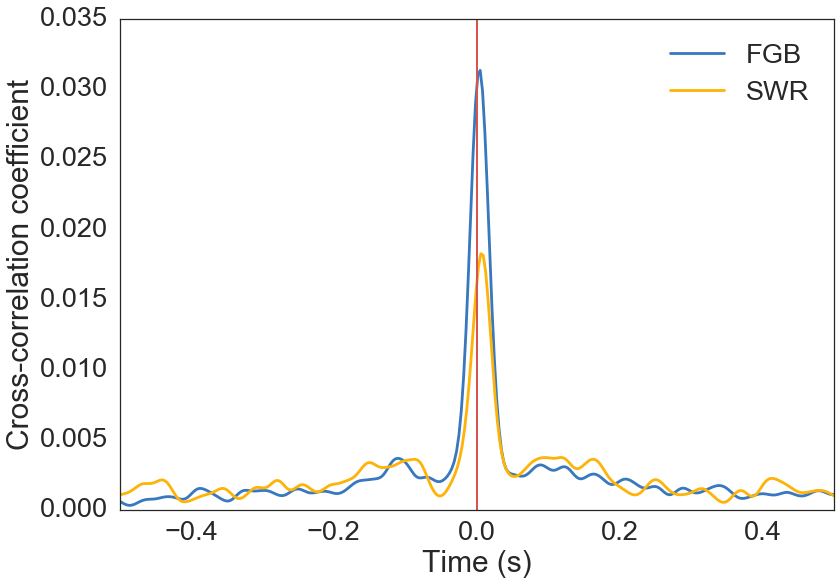

In [32]:
f,ax = pl.subplots(1,1)
labels = ['FGB','SWR']
for ic,c in enumerate([100,300]):
    lag=0.815
    RipptimeStamps = (rDF[(rDF.wc==c)].t_peak/1e3).as_matrix()
    PoptimeStamps = pDF.t_peak.as_matrix()-0.02
    differences, pred, norm = analysis.crosscorrelate(RipptimeStamps,PoptimeStamps,lag=lag)
    print norm
    counts, bin_edges = np.histogram(differences,500)
    edge_distances = np.diff(bin_edges)
    bin_centers = bin_edges[1:] - edge_distances/2
    counts = counts / norm
    #ax.plot(bin_centers, counts, lw=3,alpha=0.85,c=seabC[ic])
    #sns.kdeplot(differences,c=seabC[ic],ax=ax)
    #sns.distplot(differences,hist=False,rug=True,ax=ax)
    dens = sm.nonparametric.KDEUnivariate(differences)
    dens.fit('gau', bw=0.01, gridsize=300, cut=3, clip=[-1.0*lag,lag])
    pl.plot(dens.support[:-1],np.diff(dens.cdf),c=seabC[ic],label=labels[ic])
ax.axvline(0,linewidth=2,c=sns.xkcd_rgb["pale red"])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cross-correlation coefficient")
ax.set_xlim([-0.5,0.5])
pl.legend()

(-0.1, 0.1)

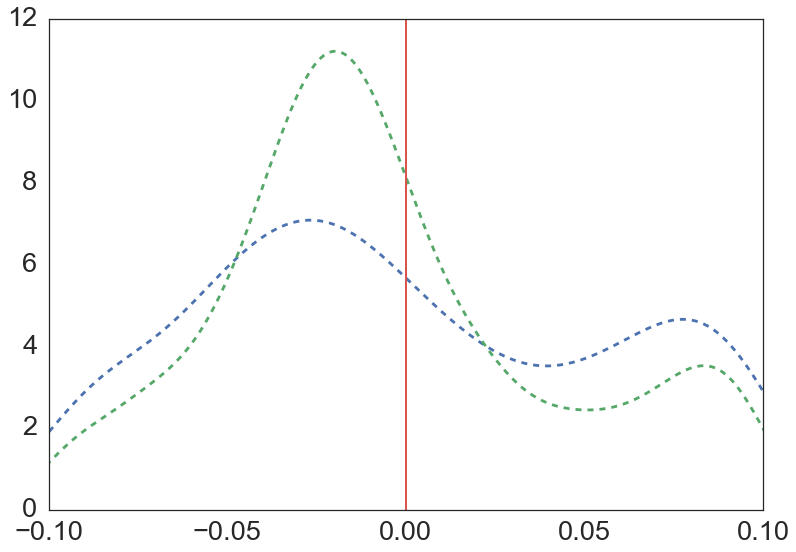

In [227]:
f,ax = pl.subplots(1,1)
for ic,c in enumerate([100,300]):
    lag=0.1
    RipptimeStamps = (rippDB[(rippDB.wc==c)].t_peak/1e3).as_matrix()
    PoptimeStamps = roDB.t_peak.as_matrix()
    differences, pred, norm = analysis.crosscorrelate(RipptimeStamps,PoptimeStamps,lag=lag)
    counts, bin_edges = np.histogram(differences,100)
    dens = sm.nonparametric.KDEUnivariate(differences)
    dens.fit('gau', bw='normal_reference', gridsize=300, cut=3, clip=[-1.0*lag,lag])
    ax.plot(dens.support,dens.density,'--')
ax.axvline(0,linewidth=2,c=sns.xkcd_rgb["pale red"])
ax.set_xlim([-1.0*lag,lag])

68.1318681319
77.6744186047
63.5705669481


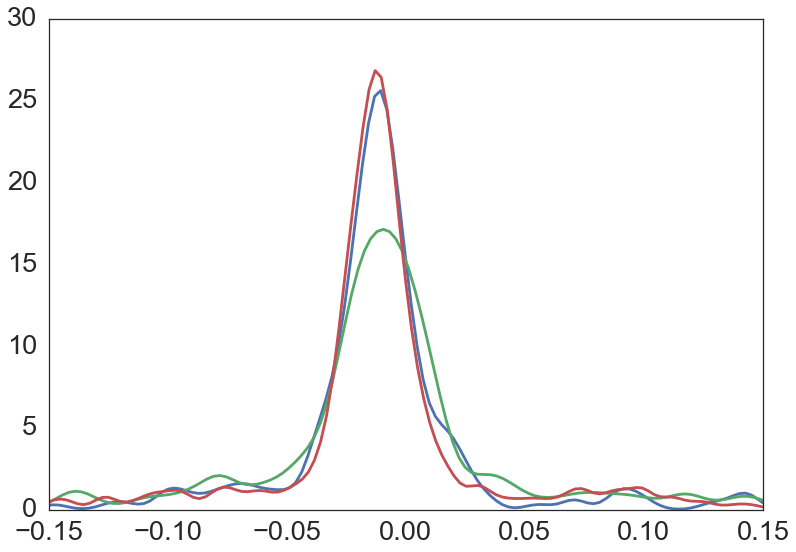

In [76]:
for idd,dday in enumerate([1,2,3]):
    rDF = rippDB[rippDB.date=='day'+str(dday)]
    rDF_PRE  = rDF[rDF.session=='PRE']
    rDF_POST = rDF[rDF.session=='POST']
    rTS = rDF.t_peak.as_matrix()/1e3
    rTS_PRE  = rDF_PRE.t_peak.as_matrix()/1e3
    rTS_POST = rDF_POST.t_peak.as_matrix()/1e3
    pDF = pd.read_pickle(dataFolder+anID+'-roDB-D'+str(dday)+'.db')
    pDF = pDF[pDF.tSub>4]
    pDF = pDF.replace('sleep01','PRE')
    pDF = pDF.replace('sleep02','POST')
    pTS = pDF.t_peak.as_matrix()-0.02
    pTS_PRE = pDF[pDF.session=='PRE'].t_peak.as_matrix()
    pTS_POST = pDF[pDF.session=='POST'].t_peak.as_matrix()
    minDist = np.array([(rTS_PRE-tP)[np.power(rTS_PRE-tP,2).argmin()] for tP in pTS_PRE])
    minDist = minDist[np.abs(minDist)<0.15]
    print 1e2*minDist.size/pTS_PRE.size
    sns.kdeplot(minDist)
    pl.xlim(-0.15,0.15)

In [53]:
minDist.shape


(829,)

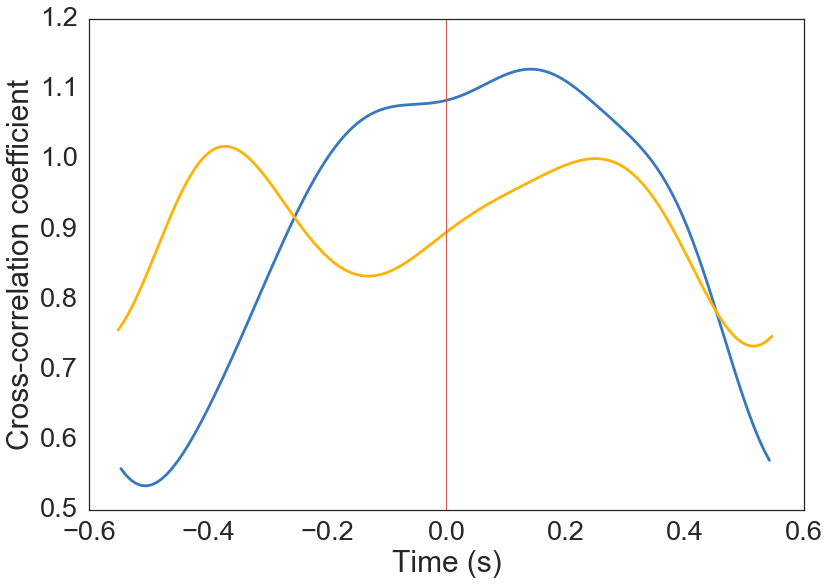

In [398]:
f,ax = pl.subplots(1,1)
for ic,c in enumerate([100,300]):
    RipptimeStamps = (rippDB[rippDB.wc==c].t_peak/1e3).as_matrix()
    PoptimeStamps = roDB[(roDB.Lpv<0.05)|(roDB.Rpv<0.05)].t_peak.as_matrix()
    differences, pred, norm = analysis.crosscorrelate(RipptimeStamps,PoptimeStamps,lag=0.5)
    counts, bin_edges = np.histogram(differences,100)
    edge_distances = np.diff(bin_edges)
    bin_centers = bin_edges[1:] - edge_distances/2
    counts = counts/ norm
    #ax.plot(bin_centers, counts, lw=3,alpha=0.85,c=seabC[ic])
    #sns.kdeplot(differences,c=seabC[ic],cut=0.5,ax=ax)
    #sns.distplot(differences,hist=False,rug=True,ax=ax)
ax.axvline(0,linewidth=1,c=sns.xkcd_rgb["pale red"])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cross-correlation coefficient")

(-0.5, 0.5)

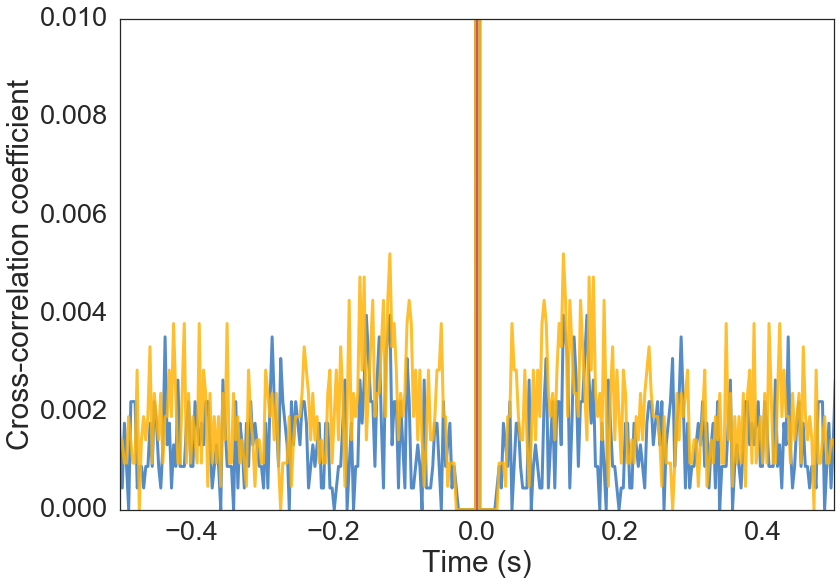

In [273]:
f,ax = pl.subplots(1,1)
for ic,c in enumerate([100,300]):
    lag=1.5
    RipptimeStamps = (rippDB[(rippDB.wc==c)].t_peak/1e3).as_matrix()
    PoptimeStamps = roDB.t_peak.as_matrix()
    differences, pred, norm = analysis.crosscorrelate(RipptimeStamps,RipptimeStamps,lag=lag)
    counts, bin_edges = np.histogram(differences,1000)
    edge_distances = np.diff(bin_edges)
    bin_centers = bin_edges[1:] - edge_distances/2
    counts = counts / norm
    ax.plot(bin_centers, counts, lw=3,alpha=0.85,c=seabC[ic])
    #sns.kdeplot(differences,c=seabC[ic],ax=ax)
    #sns.distplot(differences,hist=False,rug=True,ax=ax)
    #dens = sm.nonparametric.KDEUnivariate(differences)
    #dens.fit('gau', bw=0.02, gridsize=300, cut=3, clip=[-1.0*lag,lag])
    #pl.plot(dens.support[:-1],np.diff(dens.cdf),c=seabC[ic])
ax.axvline(0,linewidth=2,c=sns.xkcd_rgb["pale red"])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cross-correlation coefficient")
ax.set_ylim([-0,0.01])
ax.set_xlim([-0.5,0.5])
#ax.set_yscale('log')
#ax.set_xticks(np.arange(-0.2,0.2,0.05))

In [164]:
rippDB.shape

(31260, 19)